<a href="https://colab.research.google.com/github/ewanmck/learning_python/blob/master/gun_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice filtering and plotting

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
df = pd.read_csv("https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv")
print(df.head())
print(df.describe())
print(df.columns)
print(df.index)
df.corr()

     month       state  ...  return_to_seller_other  totals
0  2020-03     Alabama  ...                     0.0   92652
1  2020-03      Alaska  ...                     0.0    9939
2  2020-03     Arizona  ...                     0.0   82771
3  2020-03    Arkansas  ...                     2.0   31651
4  2020-03  California  ...                     0.0  164497

[5 rows x 27 columns]
              permit  permit_recheck  ...  return_to_seller_other         totals
count   14111.000000     2750.000000  ...             3905.000000   14135.000000
mean     7112.235490     5584.028727  ...                0.110627   24018.605943
std     26489.232087    39259.690418  ...                0.414334   39917.583636
min         0.000000        0.000000  ...                0.000000       0.000000
25%         0.000000        0.000000  ...                0.000000    4891.000000
50%       717.000000        0.000000  ...                0.000000   13017.000000
75%      5141.000000       20.000000  ...         

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
permit,1.000000,0.001404,0.209660,0.137920,0.097499,0.087378,-0.007684,0.071365,0.030169,0.041317,0.209451,0.183010,0.127112,0.019209,0.015871,-0.014014,0.019517,0.005123,0.007987,0.010504,0.002143,0.009814,0.008425,0.026540,0.765591
permit_recheck,0.001404,1.000000,0.083812,0.040471,-0.036923,0.101958,-0.009976,0.005154,-0.003982,-0.026189,-0.025511,-0.033586,-0.037779,-0.050110,-0.043506,-0.000648,-0.020884,-0.021117,-0.028931,-0.029947,-0.014018,-0.025237,-0.021587,-0.010181,0.609887
handgun,0.209660,0.083812,1.000000,0.597431,0.481111,0.410419,0.036962,0.315731,0.138061,0.154175,0.547059,0.341244,0.495396,0.460323,0.343393,0.005721,-0.064832,-0.061220,0.125723,0.104660,0.149690,0.232366,0.236793,0.094435,0.590051
long_gun,0.137920,0.040471,0.597431,1.000000,0.428935,0.303903,0.044831,0.295327,0.222669,0.126305,0.436908,0.404090,0.451627,0.242239,0.187184,0.003524,0.104037,0.132264,0.137525,0.140023,0.133075,0.152158,0.157979,0.121598,0.501715
other,0.097499,-0.036923,0.481111,0.428935,1.000000,0.292356,0.068306,0.210008,0.128834,0.146017,0.303227,0.191894,0.498040,0.170350,0.109539,0.031627,0.026100,0.037355,0.189878,0.185368,0.221819,0.183123,0.186918,0.085125,0.290339
multiple,0.087378,0.101958,0.410419,0.303903,0.292356,1.000000,0.007517,0.254039,0.136679,0.172012,0.389440,0.282691,0.565324,0.256442,0.103534,0.008665,-0.026625,-0.038694,0.169592,0.148547,0.204298,0.293950,0.303374,0.150182,0.283641
admin,-0.007684,-0.009976,0.036962,0.044831,0.068306,0.007517,1.000000,0.020602,-0.004168,0.023054,0.012858,0.004815,0.086850,0.017086,0.011423,-0.015224,-0.007903,-0.010367,0.003173,0.000917,0.007086,-0.003144,-0.001265,-0.011496,0.025352
prepawn_handgun,0.071365,0.005154,0.315731,0.295327,0.210008,0.254039,0.020602,1.000000,0.737668,0.211606,0.678536,0.650056,0.574420,0.166991,0.033926,-0.003581,0.063554,0.024957,0.153193,0.140703,0.199792,0.316966,0.320130,0.158186,0.226542
prepawn_long_gun,0.030169,-0.003982,0.138061,0.222669,0.128834,0.136679,-0.004168,0.737668,1.000000,0.203484,0.458681,0.609561,0.435042,0.156781,0.086822,0.060307,0.098720,0.060759,0.175452,0.185101,0.357461,0.164447,0.176264,0.137820,0.122930
prepawn_other,0.041317,-0.026189,0.154175,0.126305,0.146017,0.172012,0.023054,0.211606,0.203484,1.000000,0.213105,0.149049,0.343446,0.109920,0.114663,0.057636,0.082251,0.088295,0.158333,0.176363,0.236595,0.075413,0.086492,0.085633,0.098668


In [25]:
guns = df[["month","state","handgun","long_gun"]]
print(guns.corr())
print(guns["month"])

           handgun  long_gun
handgun   1.000000  0.597431
long_gun  0.597431  1.000000
0        2020-03
1        2020-03
2        2020-03
3        2020-03
4        2020-03
          ...   
14130    1998-11
14131    1998-11
14132    1998-11
14133    1998-11
14134    1998-11
Name: month, Length: 14135, dtype: object


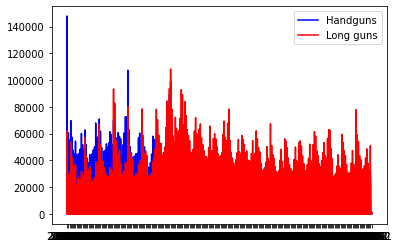

In [27]:
plt.plot(guns["month"], guns["handgun"],color='blue', label="Handguns")
plt.plot(guns["month"], guns["long_gun"], color='red', label="Long guns")
plt.legend()
plt.show()


           handgun  long_gun
handgun   1.000000  0.439493
long_gun  0.439493  1.000000


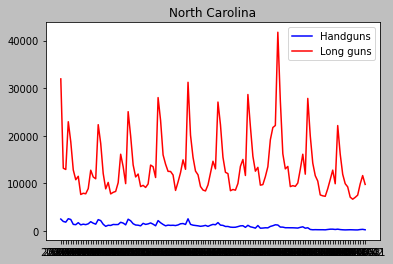

In [40]:
guns_by_month = guns.set_index("month")
plt.style.use("grayscale")
# for states in guns_by_month["state"]:
curr_state = guns_by_month[(guns_by_month["state"] == "North Carolina") & (guns_by_month.index > "2010")]
print(curr_state.corr())
plt.plot(curr_state.index, curr_state["handgun"],color='blue', label="Handguns")
plt.plot(curr_state.index, curr_state["long_gun"], color='red', label="Long guns")
plt.legend()
plt.title("North Carolina")
plt.show()  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


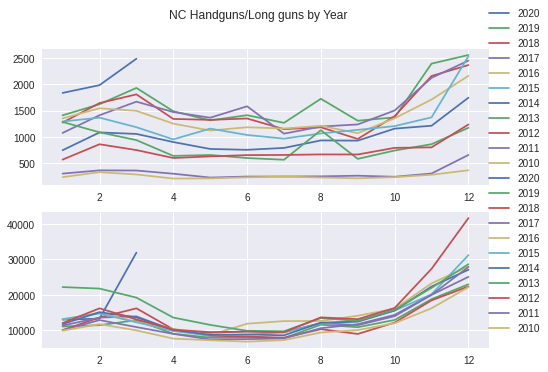

In [81]:
curr_state["year"] = pd.DatetimeIndex(curr_state.index).year
curr_state["month"] = pd.DatetimeIndex(curr_state.index).month
fig, ax = plt.subplots(2,1)
plt.style.use("seaborn")
years = curr_state["year"].unique()
for year in years:
  curr_year = curr_state[curr_state["year"] == year]
  ax[0].plot(curr_year["month"], curr_year["handgun"], label=year)
  ax[1].plot(curr_year["month"], curr_year["long_gun"], label=year)
fig.suptitle("NC Handguns/Long guns by Year")
fig.legend()
plt.autoscale(axis='both')
plt.show()